## https://www.kaggle.com/code/adnanshikh/listen-to-secrets-in-your-data

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
def info(dataset):
    
    """ This defination is to print most valuable information
        about dataset columns.
        Input: dataset
        Output: dataset columns information
    """
    for column in dataset.columns:
        print('==========%s =========='%column)
        print('Type is: ',dataset[column].dtype)
        print(dataset[column].value_counts())
        print('Number of unique values: ',dataset[column].nunique())
        print('Number of null values: ',dataset[column].isna().sum())

info(train)

==========id ==========
Type is:  int64
0          1
2000584    1
2000586    1
2000587    1
2000588    1
          ..
1000298    1
1000299    1
1000300    1
1000301    1
3000887    1
Name: id, Length: 3000888, dtype: int64
Number of unique values:  3000888
Number of null values:  0
==========date ==========
Type is:  object
2013-01-01    1782
2016-01-15    1782
2016-02-08    1782
2016-02-07    1782
2016-02-06    1782
              ... 
2014-07-13    1782
2014-07-12    1782
2014-07-11    1782
2014-07-10    1782
2017-08-15    1782
Name: date, Length: 1684, dtype: int64
Number of unique values:  1684
Number of null values:  0
==========store_nbr ==========
Type is:  int64
1     55572
46    55572
36    55572
37    55572
38    55572
39    55572
4     55572
40    55572
41    55572
42    55572
43    55572
44    55572
45    55572
47    55572
10    55572
48    55572
49    55572
5     55572
50    55572
51    55572
52    55572
53    55572
54    55572
6     55572
7     55572
8     55572
35    5557

7.358757818882655


count    3.000888e+06
mean     3.577757e+02
std      1.101998e+03
min      0.000000e+00
25%      0.000000e+00
50%      1.100000e+01
75%      1.958473e+02
max      1.247170e+05
Name: sales, dtype: float64

C:\Users\mertk\miniconda3\envs\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


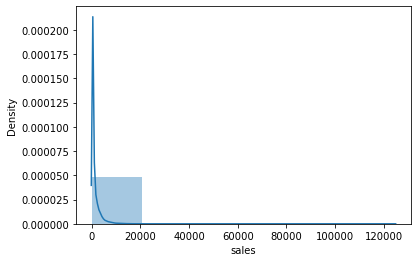

In [35]:
print(train.sales.skew())
display(train["sales"].describe())
sns.distplot(train['sales'],bins=6)
plt.show()

In [37]:
train['id']=train.id.astype('int32')
train['store_nbr']=train.store_nbr.astype('int8')
train['family']=train.family.astype('category')
train['sales']=train.sales.astype('float32')
train['onpromotion']=train.onpromotion.astype('int16')
display(train.info(verbose=True,memory_usage=True))
print('\nIndeed, we succeed to reduce the memory usage from 137M to 57M (more than half) this will be reflected in speed processing especially for EDA tasks.')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype   
---  ------       -----   
 0   id           int32   
 1   date         object  
 2   store_nbr    int8    
 3   family       category
 4   sales        float32 
 5   onpromotion  int16   
dtypes: category(1), float32(1), int16(1), int32(1), int8(1), object(1)
memory usage: 57.2+ MB


None


Indeed, we succeed to reduce the memory usage from 137M to 57M (more than half) this will be reflected in speed processing especially for EDA tasks.


In [66]:
avg_sales = train.groupby("date")["sales","onpromotion"].sum().reset_index()

C:\Users\mertk\AppData\Local\Temp\ipykernel_12868\1109737622.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avg_sales = train.groupby("date")["sales","onpromotion"].sum().reset_index()


<AxesSubplot:xlabel='onpromotion', ylabel='sales'>

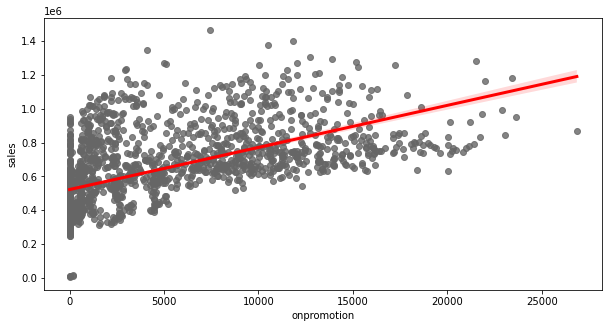

In [80]:
plt.figure(figsize=(10,5))
sns.regplot(data=avg_sales, x="onpromotion",
            y="sales",
            scatter_kws={"color":"0.4"},
            line_kws={"color":"red", "linewidth":3})

In [52]:
train[["sales","onpromotion"]].corr()

,sales,onpromotion
sales,1.000000,0.427923
onpromotion,0.427923,1.000000


In [138]:
train_eda = train.copy() ## Initializing a copy of train dataset for EDA purpose,
##                          and to preserve the original train dataset
train_eda["date"] = pd.to_datetime(train["date"])
train_eda=train_eda.set_index('date')

In [82]:
train_eda

,id,store_nbr,family,sales,onpromotion
date,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.000000,0
2013-01-01,1,1,BABY CARE,0.000000,0
2013-01-01,2,1,BEAUTY,0.000000,0
2013-01-01,3,1,BEVERAGES,0.000000,0
2013-01-01,4,1,BOOKS,0.000000,0
...,...,...,...,...,...
2017-08-15,3000883,9,POULTRY,438.132996,0
2017-08-15,3000884,9,PREPARED FOODS,154.552994,1
2017-08-15,3000885,9,PRODUCE,2419.729004,148


In [106]:
temp = train_eda.groupby("family")["sales"].mean().sort_values(ascending=False).to_frame()

In [107]:
temp

,sales
family,
GROCERY I,3776.972168
BEVERAGES,2385.793213
PRODUCE,1349.352173
CLEANING,1072.416748
DAIRY,709.154907
BREAD/BAKERY,463.336243
POULTRY,350.532288
MEATS,341.849976
PERSONAL CARE,270.432526


<AxesSubplot:xlabel='sales', ylabel='family'>

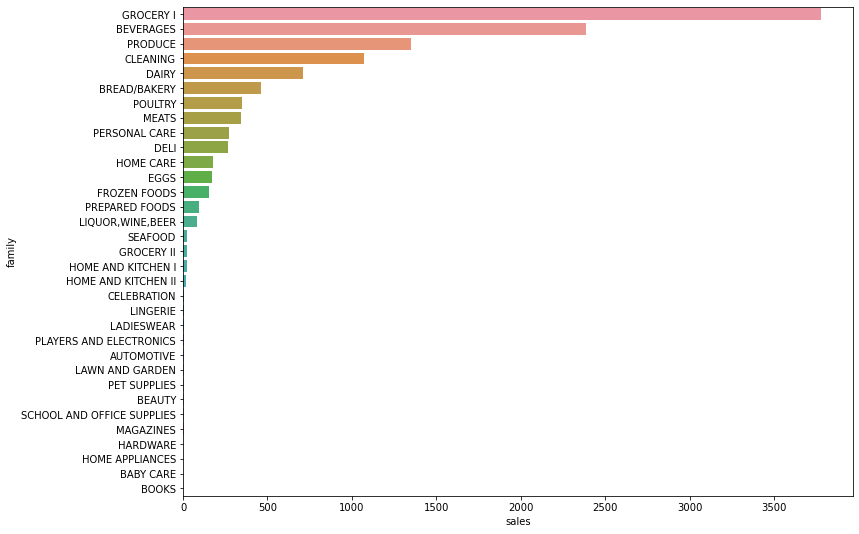

In [108]:
plt.figure(figsize=(12,9))
sns.barplot(data=temp, x=temp.sales, y=temp.index, order=list(temp.index))

In [109]:
temp = train_eda.groupby("store_nbr")["sales"].mean().sort_values(ascending=False).to_frame()

In [110]:
temp

,sales
store_nbr,
44,1117.245239
45,980.673889
47,916.798218
3,908.405518
49,781.330444
46,753.905945
48,646.604919
51,592.231506
8,548.734741


<AxesSubplot:xlabel='store_nbr', ylabel='sales'>

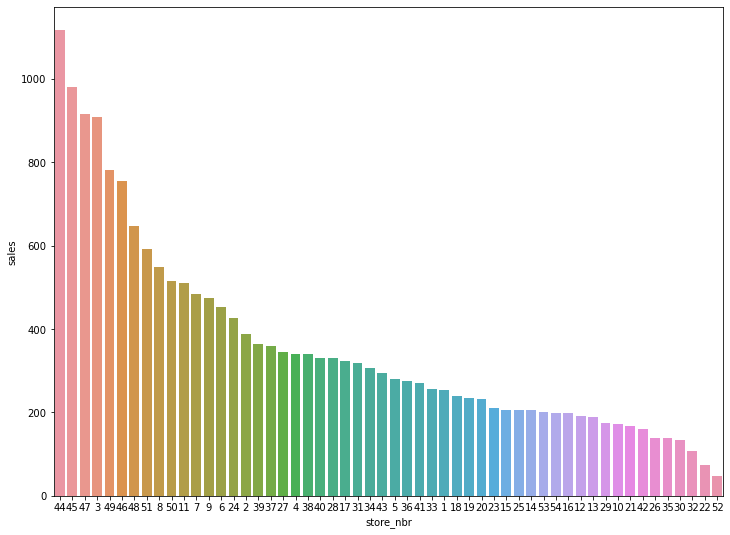

In [111]:
plt.figure(figsize=(12,9))
sns.barplot(data=temp, x=temp.index, y=temp.sales, order=list(temp.index))

In [118]:
avg_sales=train_eda.groupby('date').sales.mean()
avg_sales

date
2013-01-01      1.409438
2013-01-02    278.390808
2013-01-03    202.840195
2013-01-04    198.911148
2013-01-05    267.873230
                 ...    
2017-08-11    463.733856
2017-08-12    444.798279
2017-08-13    485.768616
2017-08-14    427.004730
2017-08-15    427.980896
Name: sales, Length: 1684, dtype: float32

In [126]:
moving_avg = avg_sales.rolling(window=365, min_periods=183).mean()
moving_avg

date
2013-01-01           NaN
2013-01-02           NaN
2013-01-03           NaN
2013-01-04           NaN
2013-01-05           NaN
                 ...    
2017-08-11    471.481917
2017-08-12    471.783104
2017-08-13    471.967562
2017-08-14    472.038310
2017-08-15    472.039595
Name: sales, Length: 1684, dtype: float64

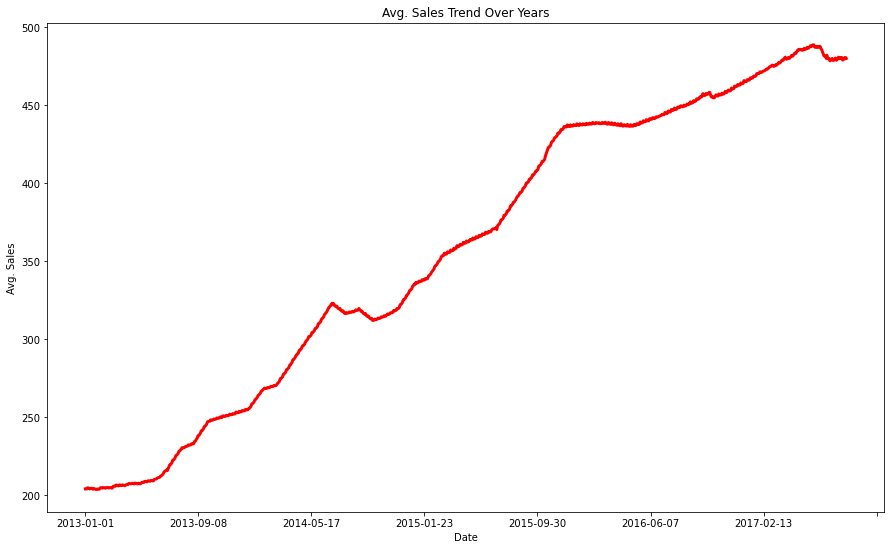

In [132]:
avg_sales=train_eda.groupby('date').sales.mean()
moving_avg=avg_sales.rolling(window=365,min_periods=183,center=True).mean()
plt.figure(figsize=(15,9))
ax=moving_avg.plot(color='red',linewidth=3)
plt.xlabel('Date')
plt.ylabel('Avg. Sales')
plt.title('Avg. Sales Trend Over Years')
plt.show()

In [139]:
avg_sales = train_eda.groupby("date")["sales"].mean().to_frame()

In [141]:
avg_sales["day"] = avg_sales.index.dayofweek
avg_sales["week"] = avg_sales.index.week

C:\Users\mertk\AppData\Local\Temp\ipykernel_12868\2825197166.py:2: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  avg_sales["week"] = avg_sales.index.week


In [147]:
avg_sales["dayofyear"] = avg_sales.index.dayofyear
avg_sales["year"] = avg_sales.index.year


In [148]:
seasonal_plot(avg_sales, y=avg_sales['sales'], period="week", freq="day")
seasonal_plot(avg_sales, y=avg_sales['sales'], period="year", freq="dayofyear")

NameError: name 'seasonal_plot' is not defined

In [149]:
plot_periodogram(avg_sales.sales);

NameError: name 'plot_periodogram' is not defined